       'relationship', 'ethnicity', 'gender', 'loan'],
      dtype='object'). If you see an error these are not correct, please provide them as a string array as: categorical_cols=['col1', 'col2', ...]


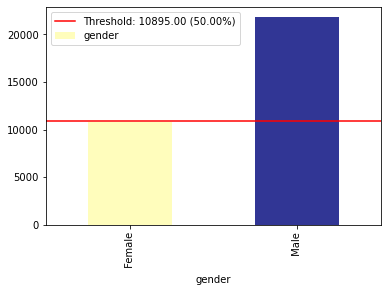

       'relationship', 'ethnicity', 'gender', 'loan'],
      dtype='object'). If you see an error these are not correct, please provide them as a string array as: categorical_cols=['col1', 'col2', ...]


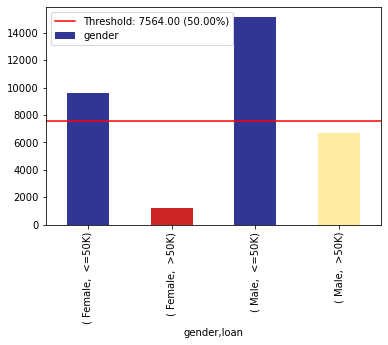

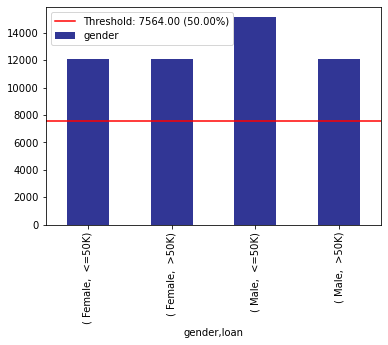

       'relationship', 'ethnicity', 'gender', 'loan'],
      dtype='object'). If you see an error these are not correct, please provide them as a string array as: categorical_cols=['col1', 'col2', ...]


(' Female', ' <=50K')
4      <=50K
5      <=50K
6      <=50K
12     <=50K
21     <=50K
Name: loan, dtype: object 

(' Female', ' >50K')
8      >50K
19     >50K
52     >50K
67     >50K
84     >50K
Name: loan, dtype: object 

(' Male', ' <=50K')
0      <=50K
1      <=50K
2      <=50K
3      <=50K
13     <=50K
Name: loan, dtype: object 

(' Male', ' >50K')
7      >50K
9      >50K
10     >50K
11     >50K
14     >50K
Name: loan, dtype: object 



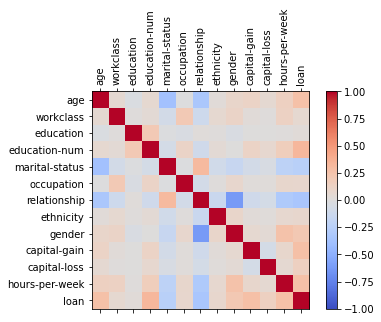

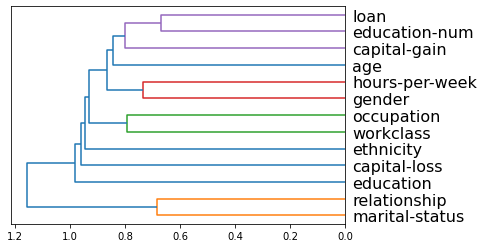

NameError: name 'x' is not defined

In [3]:
import xai.data
df = xai.data.load_census()
df.head()

ims = xai.imbalance_plot(df, "gender")

im = xai.imbalance_plot(df, "gender", "loan")

bal_df = xai.balance(df, "gender", "loan", upsample=0.8)


groups = xai.group_by_columns(df, ["gender", "loan"])
for group, group_df in groups:    
    print(group) 
    print(group_df["loan"].head(), "\n")

_ = xai.correlations(df, include_categorical=True, plot_type="matrix")

_ = xai.correlations(df, include_categorical=True)

# Balanced train-test split with minimum 300 examples of 
#     the cross of the target y and the column gender
x_train, y_train, x_test, y_test, train_idx, test_idx = \
    xai.balanced_train_test_split(
            x, y, "gender", 
            min_per_group=300,
            max_per_group=300,
            categorical_cols=categorical_cols)

x_train_display = bal_df[train_idx]
x_test_display = bal_df[test_idx]

print("Total number of examples: ", x_test.shape[0])

df_test = x_test_display.copy()
df_test["loan"] = y_test

_= xai.imbalance_plot(df_test, "gender", "loan", categorical_cols=categorical_cols)

model = build_model(proc_df.drop("loan", axis=1))

model.fit(f_in(x_train), y_train, epochs=50, batch_size=512)

probabilities = model.predict(f_in(x_test))
predictions = list((probabilities >= 0.5).astype(int).T[0])

def get_avg(x, y):
    return model.evaluate(f_in(x), y, verbose=0)[1]

imp = xai.feature_importance(x_test, y_test, get_avg)

imp.head()

In [2]:
x

NameError: name 'x' is not defined